In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_descriptor  = pd.read_csv('descriptor_data-CTE.csv')
df_descriptor = df_descriptor.drop(['Unnamed: 0', 'index', 'SPS.1'], axis=1)
df_descriptor

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,13.189789,13.189789,0.074233,-0.590736,0.284516,11.238095,552.542,532.382,552.132136,202,...,0,0,0,0,0,0,0,0,0,0
1,12.828811,12.828811,0.100196,-0.575081,0.514340,11.310345,384.347,372.251,384.074621,140,...,0,0,0,0,0,0,0,0,0,0
2,12.979854,12.979854,0.084943,-0.585499,0.402899,11.222222,476.444,460.316,476.100836,174,...,0,0,0,0,0,0,0,0,0,0
3,13.276309,13.276309,0.049066,-0.773498,0.138899,13.148936,624.561,604.401,624.116880,228,...,0,0,0,0,0,0,0,0,0,0
4,12.854852,12.854852,0.116999,-0.561307,0.502868,11.448276,400.415,388.319,400.051778,140,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,13.149387,13.149387,0.084365,-0.584337,0.402613,12.028571,462.425,448.313,462.107653,168,...,0,0,0,0,0,0,0,0,0,0
485,13.306268,13.306268,0.076845,-0.589357,0.364097,11.900000,524.496,508.368,524.123303,190,...,0,0,0,0,0,0,0,0,0,0
486,15.174654,15.174654,0.017137,-6.113792,0.096560,14.746667,1008.927,974.655,1008.227021,368,...,0,0,0,0,0,0,0,0,0,0
487,15.261677,15.261677,0.017447,-6.093399,0.102709,14.329412,1129.125,1086.789,1128.299792,412,...,0,0,0,0,0,0,0,0,0,0


In [2]:
target_values = pd.read_excel('PI-CTE.xlsx')
target_values = target_values['CTE (ppm/K)']

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

std = MinMaxScaler()
df_descriptor_s = std.fit_transform(df_descriptor)

In [4]:
from sklearn.feature_selection import VarianceThreshold
import pandas as pd

sel = VarianceThreshold(threshold=0.01)
X_sel = sel.fit_transform(df_descriptor_s)
feature_index = sel.get_support()

selected_columns = df_descriptor.columns[feature_index]

X_sel_df = pd.DataFrame(X_sel, columns=selected_columns)

print('number of features after remove redundant ones:', sum(feature_index))

number of features after remove redundant ones: 143


In [5]:
y = target_values

In [6]:
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor

xgb2 = XGBRegressor()
xgb2 = xgb2.fit(X_sel_df, y)
sfm = SelectFromModel(estimator=xgb2, prefit=True, max_features=30)
X_sfm = sfm.transform(X_sel_df)
print(X_sfm.shape)

(489, 25)


D:\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [7]:
feature_index = sfm.get_support()
selected_columns = X_sel_df.columns[feature_index]
X_sfm = pd.DataFrame(X_sfm, columns=selected_columns)
X_sfm

,MinPartialCharge,MaxAbsPartialCharge,BCUT2D_MWLOW,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_MRHI,BCUT2D_MRLOW,Chi2n,Kappa3,PEOE_VSA6,...,SlogP_VSA3,SlogP_VSA6,SlogP_VSA8,EState_VSA9,NumRotatableBonds,RingCount,MolLogP,fr_bicyclic,fr_ketone,fr_pyridine
0,0.230069,0.594958,0.889332,0.743626,0.269998,0.000226,0.601649,0.249642,0.322676,0.228571,...,0.000000,0.540522,0.421245,0.136106,0.384615,0.272727,0.303945,0.166667,0.000000,0.0
1,0.230078,0.594951,1.000000,0.813448,0.139899,0.000072,0.602106,0.083085,0.124238,0.085714,...,0.000000,0.345400,0.299054,0.068053,0.153846,0.090909,0.103732,0.166667,0.000000,0.0
2,0.230087,0.594944,1.000000,0.760201,0.231009,0.000115,0.591739,0.166170,0.233588,0.085714,...,0.000000,0.442961,0.299054,0.136106,0.307692,0.181818,0.207465,0.166667,0.000000,0.0
3,0.230078,0.594951,0.892595,0.644589,0.318498,0.117677,0.282077,0.285207,0.447841,0.085714,...,0.000000,0.463415,0.000000,0.204159,0.461538,0.272727,0.299414,0.166667,0.000000,0.0
4,0.999873,0.000067,1.000000,0.863536,0.239804,0.642356,0.996194,0.083085,0.141045,0.141111,...,0.000000,0.384765,0.299054,0.000000,0.153846,0.090909,0.124504,0.166667,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,0.785211,0.165954,1.000000,0.961344,0.191282,0.000861,0.962931,0.181352,0.116432,0.057143,...,0.169322,0.296619,0.669305,0.000000,0.076923,0.272727,0.082764,0.333333,0.000000,0.0
485,0.785261,0.165915,1.000000,0.796614,0.264151,0.001005,1.000000,0.240067,0.167022,0.142857,...,0.000000,0.418570,0.731761,0.143206,0.153846,0.363636,0.166812,0.333333,0.000000,0.0
486,0.000000,0.772751,0.295619,0.138808,0.798135,0.195618,0.001292,0.685276,0.695312,0.600000,...,0.245287,0.756098,0.489188,0.000000,0.615385,0.636364,0.706270,0.166667,0.333333,0.0
487,0.998136,0.430946,0.295619,0.138807,0.799206,0.195630,0.001291,0.832758,0.840117,1.000000,...,0.245287,1.000000,0.733571,0.000000,0.769231,0.818182,0.933309,0.166667,0.333333,0.0


In [8]:
X_sfm.columns

Index(['MinPartialCharge', 'MaxAbsPartialCharge', 'BCUT2D_MWLOW',
       'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'Chi2n',
       'Kappa3', 'PEOE_VSA6', 'SMR_VSA3', 'SMR_VSA5', 'SMR_VSA9', 'SlogP_VSA1',
       'SlogP_VSA11', 'SlogP_VSA3', 'SlogP_VSA6', 'SlogP_VSA8', 'EState_VSA9',
       'NumRotatableBonds', 'RingCount', 'MolLogP', 'fr_bicyclic', 'fr_ketone',
       'fr_pyridine'],
      dtype='object')

In [6]:
X_sfm = df_descriptor[['MinPartialCharge', 'MaxAbsPartialCharge', 'BCUT2D_MWLOW',
       'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'Chi2n',
       'Kappa3', 'PEOE_VSA6', 'SMR_VSA3', 'SMR_VSA5', 'SMR_VSA9', 'SlogP_VSA1',
       'SlogP_VSA11', 'SlogP_VSA3', 'SlogP_VSA6', 'SlogP_VSA8', 'EState_VSA9',
       'NumRotatableBonds', 'RingCount', 'MolLogP', 'fr_bicyclic', 'fr_ketone',
       'fr_pyridine']]
X_sfm

,MinPartialCharge,MaxAbsPartialCharge,BCUT2D_MWLOW,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_MRHI,BCUT2D_MRLOW,Chi2n,Kappa3,PEOE_VSA6,...,SlogP_VSA3,SlogP_VSA6,SlogP_VSA8,EState_VSA9,NumRotatableBonds,RingCount,MolLogP,fr_bicyclic,fr_ketone,fr_pyridine
0,-0.457384,0.457384,10.057472,-2.095173,2.290193,5.975161,0.481770,9.735626,4.368556,48.530937,...,0.000000,134.439123,38.359186,9.473726,6,7,5.6798,2,0,0
1,-0.457382,0.457382,10.121493,-2.062077,2.220816,5.974676,0.482357,6.581355,2.596213,18.199101,...,0.000000,85.908186,27.232283,4.736863,3,5,2.2205,2,0,0
2,-0.457380,0.457380,10.121493,-2.087316,2.269402,5.974811,0.469060,8.154822,3.572863,18.199101,...,0.000000,110.173655,27.232283,9.473726,5,6,4.0128,2,0,0
3,-0.457382,0.457382,10.059360,-2.142117,2.316057,6.343692,0.071888,10.409149,5.486460,18.199101,...,0.000000,115.260974,0.000000,14.210589,7,7,5.6015,2,0,0
4,-0.288136,0.288136,10.121493,-2.038335,2.274092,7.989994,0.987813,6.581355,2.746323,29.960986,...,0.000000,95.699153,27.232283,0.000000,3,5,2.5794,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,-0.335332,0.335332,10.121493,-1.991973,2.248217,5.977153,0.945150,8.442343,2.526499,12.132734,...,7.047672,73.775452,60.947895,0.000000,2,7,1.8582,4,0,0
485,-0.335320,0.335320,10.121493,-2.070056,2.287076,5.977603,0.992695,9.554285,2.978340,30.331835,...,0.000000,104.107288,66.635281,9.967957,3,8,3.3104,4,0,0
486,-0.507966,0.507966,9.714010,-2.381858,2.571831,6.588249,-0.288246,17.985680,7.696732,127.393708,...,10.209528,188.057379,44.546224,0.000000,9,11,12.6312,2,1,0
487,-0.288518,0.410722,9.714010,-2.381859,2.572402,6.588288,-0.288247,20.778683,8.990052,212.322847,...,10.209528,248.721050,66.800030,0.000000,11,13,16.5540,2,1,0


In [8]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sfm, y, test_size=0.2,random_state=1)

xgb2 = XGBRegressor()
xgb2.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

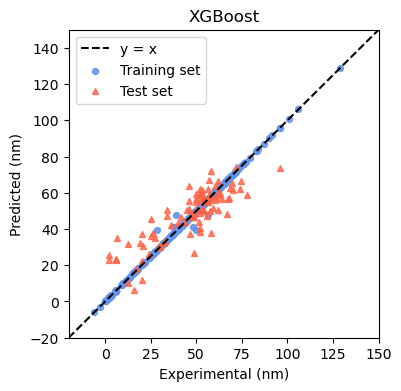

In [11]:
y_pred_train_xgb2 = xgb2.predict(X_train)
y_pred_test_xgb2 = xgb2.predict(X_test)

plt.figure(figsize=(4,4))
plt.plot([-20, 150], [-20, 150], 'k--', label = 'y = x')
plt.scatter(y_train, y_pred_train_xgb2, alpha=0.9, label='Training set', color='cornflowerblue', marker='o', s=18)  # Set color to cornflowerblue
plt.scatter(y_test, y_pred_test_xgb2, alpha=0.8, label='Test set', color='tomato', marker='^', s=18)  # Set color to tomato
plt.xlim(-20, 150)
plt.ylim(-20, 150)
plt.title('XGBoost')
plt.legend()
plt.xlabel('Experimental (nm)')
plt.ylabel('Predicted (nm)')
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

print('training R = %.3f' % np.sqrt(r2_score(y_train, xgb2.predict(X_train))))
print('training R2 = %.3f' % r2_score(y_train, xgb2.predict(X_train)))
print('training RMSE = %.3f' % np.sqrt(mean_squared_error(y_train, xgb2.predict(X_train))))

print('test R = %.3f' % np.sqrt(r2_score(y_test, xgb2.predict(X_test))))
print('test R2 = %.3f' % r2_score(y_test, xgb2.predict(X_test)))
print('test RMSE = %.3f' % np.sqrt(mean_squared_error(y_test, xgb2.predict(X_test))))

training R = 0.999
training R2 = 0.997
training RMSE = 1.076
test R = 0.842
test R2 = 0.709
test RMSE = 9.933


In [13]:
from sklearn.model_selection import KFold, cross_val_score

crossvalidation = KFold(n_splits=10, shuffle=True,random_state=1)                        
r2_scores_xgb2 = cross_val_score(xgb2, X_sfm, y, scoring='r2', cv=crossvalidation)
rmse_scores_xgb2 = cross_val_score(xgb2, X_sfm,y, scoring='neg_root_mean_squared_error', cv=crossvalidation)
print('Cross-Validation Results:')
print('Folds:%i, mean R: %.3f' %(len(r2_scores_xgb2), np.sqrt(r2_scores_xgb2.mean())))
print('Folds:%i, mean R2: %.3f' %(len(r2_scores_xgb2), r2_scores_xgb2.mean()))
print('Folds:%i, mean RMSE: %.3f' %(len(rmse_scores_xgb2), -rmse_scores_xgb2.mean()))

Cross-Validation Results:
Folds:10, mean R: 0.793
Folds:10, mean R2: 0.629
Folds:10, mean RMSE: 12.130


In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': list(range(100, 400, 50)),
    'max_depth': [5,6,7,8,9,10,11,12],
    'learning_rate': np.arange(0, 0.1, 0.01),
    'gamma':np.arange(0,0.1, 0.01),
    'min_child_weight':range(1, 5, 1)
}


grid_search = GridSearchCV(estimator=xgb2, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

Fitting 5 folds for each of 19200 candidates, totalling 96000 fits
Best parameters found:  {'gamma': 0.05, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 250}
Best score found:  0.638904882260969


In [15]:
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

print('test R = %.3f' % np.sqrt(r2_score(y_test, y_pred)))
print('test R2 = %.3f' % r2_score(y_test, y_pred))
print('test RMSE = %.3f' % np.sqrt(mean_squared_error(y_test, y_pred)))

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)                       
r2_scores_xgb = cross_val_score(best_xgb, X_sfm, y, scoring='r2', cv=crossvalidation)
rmse_scores_xgb = cross_val_score(best_xgb, X_sfm,y, scoring='neg_root_mean_squared_error', cv=crossvalidation)
print('Cross-Validation Results:')
print('Folds:%i, mean R: %.3f' %(len(r2_scores_xgb), np.sqrt(r2_scores_xgb.mean())))
print('Folds:%i, mean R2: %.3f' %(len(r2_scores_xgb), r2_scores_xgb.mean()))
print('Folds:%i, mean RMSE: %.3f' %(len(rmse_scores_xgb), -rmse_scores_xgb.mean()))

test R = 0.864
test R2 = 0.746
test RMSE = 9.281
Cross-Validation Results:
Folds:10, mean R: 0.802
Folds:10, mean R2: 0.643
Folds:10, mean RMSE: 11.974


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sfm, y, test_size=0.2,random_state=1)

In [12]:
from xgboost import XGBRegressor
best_xgb = XGBRegressor(gamma=0.05, learning_rate=0.05, max_depth= 5, min_child_weight=3, n_estimators=250)
best_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.05, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=250, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

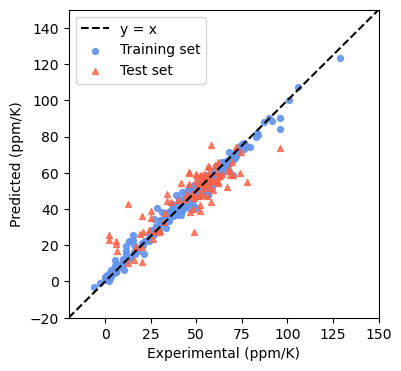

In [33]:
y_pred_train_xgb = best_xgb.predict(X_train)
y_pred_test_xgb = best_xgb.predict(X_test)

plt.figure(figsize=(4,4))
plt.plot([-20, 150], [-20, 150], 'k--', label = 'y = x')
plt.scatter(y_train, y_pred_train_xgb, alpha=0.9, label='Training set', color='cornflowerblue', marker='o', s=18)  # Set color to cornflowerblue
plt.scatter(y_test, y_pred_test_xgb, alpha=0.8, label='Test set', color='tomato', marker='^', s=18)  # Set color to tomato
plt.xlim(-20, 150)
plt.ylim(-20, 150)
plt.legend()
plt.xlabel('Experimental (ppm/K)')
plt.ylabel('Predicted (ppm/K)')
plt.savefig('XGB-best.png',dpi=300, bbox_inches='tight')
plt.show()

In [34]:
import joblib

joblib.dump(best_xgb, 'best_xgb.pkl')

best_xgb = joblib.load('best_xgb.pkl')

In [19]:
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error, make_scorer

print('training R = %.3f' % np.sqrt(r2_score(y_train, best_xgb.predict(X_train))))
print('training R2 = %.3f' % r2_score(y_train, best_xgb.predict(X_train)))
print('training RMSE = %.3f' % np.sqrt(mean_squared_error(y_train, best_xgb.predict(X_train))))
print('training MAE = %.3f' %mean_absolute_error(y_train, best_xgb.predict(X_train)))

print('test R = %.3f' % np.sqrt(r2_score(y_test, best_xgb.predict(X_test))))
print('test R2 = %.3f' % r2_score(y_test, best_xgb.predict(X_test)))
print('test RMSE = %.3f' % np.sqrt(mean_squared_error(y_test, best_xgb.predict(X_test))))
print('training MAE = %.3f' %mean_absolute_error(y_test, best_xgb.predict(X_test)))

training R = 0.991
training R2 = 0.982
training RMSE = 2.777
training MAE = 1.887
test R = 0.864
test R2 = 0.746
test RMSE = 9.281
training MAE = 6.996


In [20]:
from sklearn.model_selection import KFold, cross_val_score

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)                      
r2_scores_xgb = cross_val_score(best_xgb, X_sfm, y, scoring='r2', cv=crossvalidation)
rmse_scores_xgb = cross_val_score(best_xgb, X_sfm,y, scoring='neg_root_mean_squared_error', cv=crossvalidation)
mae_scores_xgb = cross_val_score(best_xgb, X_sfm, y, scoring=make_scorer(mean_absolute_error), cv=crossvalidation)

print('Cross-Validation Results:')
print('Folds:%i, mean R: %.3f' %(len(r2_scores_xgb), np.sqrt(r2_scores_xgb.mean())))
print('Folds:%i, mean R2: %.3f' %(len(r2_scores_xgb), r2_scores_xgb.mean()))
print('Folds:%i, mean RMSE: %.3f' %(len(rmse_scores_xgb), -rmse_scores_xgb.mean()))
print('Folds:%i, mean MAE: %.3f' %(len(mae_scores_xgb), mae_scores_xgb.mean()))

Cross-Validation Results:
Folds:10, mean R: 0.802
Folds:10, mean R2: 0.643
Folds:10, mean RMSE: 11.974
Folds:10, mean MAE: 8.507


In [21]:
std_error_r = np.std(np.sqrt(r2_scores_xgb))
print("R的误差范围：%.3f" %(std_error_r))
std_error_r2 = np.std(r2_scores_xgb)
print("R2的误差范围：%.3f" %(std_error_r2))
std_error_rmse = np.std(rmse_scores_xgb)
print("RMSE的误差范围：%.3f" %(std_error_rmse))
std_error_mae = np.std(mae_scores_xgb)
print("MAE的误差范围：%.3f" %(std_error_mae))

R的误差范围：0.058
R2的误差范围：0.090
RMSE的误差范围：2.080
MAE的误差范围：1.417


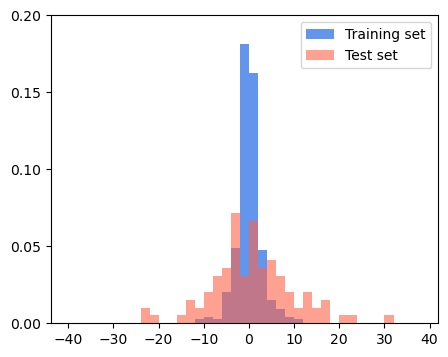

In [23]:
plt.figure(figsize=(5, 4))
plt.hist(best_xgb.predict(X_train)-y_train, color='cornflowerblue',
         bins=np.arange(-40, 40, 2), density=True, label= 'Training set' )
plt.hist(best_xgb.predict(X_test)-y_test, color='tomato',
         bins=np.arange(-40, 40, 2), density=True, alpha=0.6, label= 'Test set' )
plt.legend()
plt.yticks(np.arange(0, 0.25, 0.05))  
plt.savefig('XGB-error_distribution.png',dpi=300, bbox_inches='tight')
plt.show()